In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import difflib
import numpy as np
from joblib import Parallel, delayed

In [111]:
df = pd.read_csv('all_results.csv')

In [112]:
df.shape

(517401, 7)

In [113]:
df.rename(columns={'0':'MessageID', '1':'DateTime', '2':'From', '3':'To', '4':'Subject', '5':'Body'}, inplace=True)

In [114]:
df['DateTime'] = df['DateTime'].apply(lambda x: x[5:-1])

In [115]:
df['From'] = df['From'].apply(lambda x: x.split(':')[1:][0][:-1])
df['To'] = df['To'].apply(lambda x: x.split(':')[1:][0][:-1])

In [ ]:
df['MessageID'] = df['MessageID'].apply(lambda x: x.split(':')[1:][0][:-1])

In [124]:
df['Subject'] = df['Subject'].apply(lambda x: x[9:-1])

In [125]:
df['AccountName'] = df['path'].apply(lambda x: x.split('\\')[4])
df['Folder'] = df['path'].apply(lambda x: x.split('\\')[5])

In [126]:
df.to_csv('all_results_process_stage_1.csv', index=False, encoding='utf-8')

In [ ]:
#Stage 1 processing

In [149]:
df = pd.read_csv('all_results_process_stage_1.csv', encoding='utf-8')

In [150]:
df = df[df['Subject'].isnull() == False]

In [5]:
junk_folders = ['discussion_threads', 'sent_mail', 'all_documents', 'deleted_items']

In [6]:
df_restricted = df[(df['Folder'].isin(junk_folders) == False)]

In [ ]:
###########Stage 1A finished

In [8]:
df_restricted.to_csv('all_results_process_stage_1a.csv', index=False, encoding='utf-8')

In [17]:
df_restricted = pd.read_csv('all_results_process_stage_1a.csv', encoding='utf-8')

In [177]:
#Dedupe
df_restricted = df_restricted[df_restricted.duplicated(subset=['DateTime', 'From', 'To', 'Subject']) == False]

In [166]:
reply_subjects = df_restricted[(df_restricted['Subject'].str.contains('RE:')) | \
              (df_restricted['Subject'].str.contains('Re:')) | \
              (df_restricted['Subject'].str.contains('re:'))]['Subject'].values

fwd_subjects = df_restricted[(df_restricted['Subject'].str.contains('FW:')) | \
              (df_restricted['Subject'].str.contains('Fw:')) | \
              (df_restricted['Subject'].str.contains('fw:'))]['Subject'].values

In [167]:
thread_names = list(reply_subjects) + list(fwd_subjects)

In [168]:
other_subjects = df_restricted[df_restricted['Subject'].isin(thread_names) == False]

In [170]:
[subject for subject in all_subjects if difflib.SequenceMatcher(None, a=subject, b=reply_subjects[10]).ratio()>0.8]        

['RE: Stagecoach', 'RE: stage coach', 'Re: Stagecoach', 'Re: stage coach']

In [151]:
df.head()

,MessageID,DateTime,From,To,Subject,Body,path,AccountName,Folder
0,Message-ID: <29790972.1075855665306.JavaMail.e...,"Wed, 13 Dec 2000 18:41:00 -0800 (PST)",1.11913372.-2@multexinvestornetwork.com,pallen@enron.com,"December 14, 2000 - Bear Stearns' predictions ...","[' America\n', 'Mime-Version: 1.0\n', 'Content...",d:\datasets\maildir\\allen-p\all_documents\1,allen-p,all_documents
1,Message-ID: <21975671.1075855665520.JavaMail.e...,"Wed, 13 Dec 2000 08:35:00 -0800 (PST)",messenger@ecm.bloomberg.com,Bloomberg Power Lines Report,ion: 1.0,['Content-Type: text/plain; charset=ANSI_X3.4-...,d:\datasets\maildir\\allen-p\all_documents\10,allen-p,all_documents
2,Message-ID: <7452188.1075855667684.JavaMail.ev...,"Mon, 9 Oct 2000 07:16:00 -0700 (PDT)",phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,"['Mime-Version: 1.0\n', 'Content-Type: text/pl...",d:\datasets\maildir\\allen-p\all_documents\100,allen-p,all_documents
3,Message-ID: <23790115.1075855667708.JavaMail.e...,"Mon, 9 Oct 2000 07:00:00 -0700 (PDT)",phillip.allen@enron.com,keith.holst@enron.com,Consolidated positions: Issues & To Do list,"['Mime-Version: 1.0\n', 'Content-Type: text/pl...",d:\datasets\maildir\\allen-p\all_documents\101,allen-p,all_documents
5,Message-ID: <14670081.1075855667751.JavaMail.e...,"Thu, 5 Oct 2000 05:55:00 -0700 (PDT)",phillip.allen@enron.com,paula.harris@enron.com,Re: 2001 Margin Plan,"['Mime-Version: 1.0\n', 'Content-Type: text/pl...",d:\datasets\maildir\\allen-p\all_documents\103,allen-p,all_documents


In [161]:
t['MessageID'].unique()

array(['Message-ID: <5161987.1075855666285.JavaMail.evans@thyme>\n',
       'Message-ID: <9153929.1075855697853.JavaMail.evans@thyme>\n',
       'Message-ID: <24925859.1075855677658.JavaMail.evans@thyme>\n',
       'Message-ID: <33257576.1075855679568.JavaMail.evans@thyme>\n',
       'Message-ID: <12327474.1075855717072.JavaMail.evans@thyme>\n',
       'Message-ID: <10432634.1075855727436.JavaMail.evans@thyme>\n'], dtype=object)

In [162]:
t = df[df['Subject'].str.contains('stage coach')]

,MessageID,DateTime,From,To,Subject,Body,path,AccountName,Folder
284,Message-ID: <5161987.1075855666285.JavaMail.ev...,"Tue, 12 Dec 2000 05:27:00 -0800 (PST)",jsmith@austintx.com,phillip.k.allen@enron.com,RE: stage coach,"['Mime-Version: 1.0\n', 'Content-Type: text/pl...",d:\datasets\maildir\\allen-p\all_documents\36,allen-p,all_documents
482,Message-ID: <9153929.1075855697853.JavaMail.ev...,"Wed, 7 Feb 2001 06:54:00 -0800 (PST)",phillip.allen@enron.com,jsmith@austintx.com,Re: stage coach,"['Mime-Version: 1.0\n', 'Content-Type: text/pl...",d:\datasets\maildir\\allen-p\all_documents\538,allen-p,all_documents


In [183]:
df_restricted = df_restricted[(df_restricted['From'].str.contains('enron')) & (df_restricted['To'].str.contains('enron'))
                             & (df_restricted['From'].str.contains('mailman')==False)]

In [184]:
df_restricted.shape

(139837, 9)

In [140]:
len(other_subjects)

164665

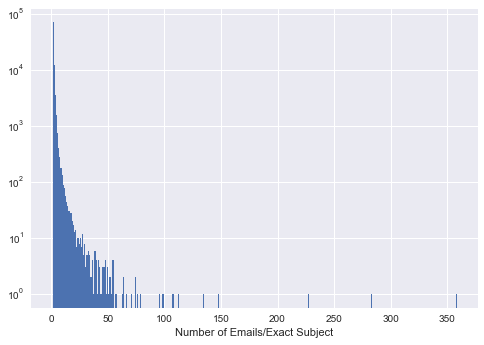

In [189]:
plt.hist(subject_counts['MessageID'].values, bins=[i for i in range(360)], log=True)
plt.xlabel('Number of Emails/Exact Subject')
plt.show()

In [239]:
df_threads = df_restricted[df_restricted['Subject'].isin(thread_subjects)].sort_values(by=['Subject', 'DateTime'])

In [358]:
import re

removelist = ".?!"
pattern = r'[^\w'+removelist+']'

In [366]:
def cleanBody(body):
    body_text = body[body.index('X-FileName:'):].split('\\n')[2:]
    #Replace these lines with regex!
    body_text = [sent for sent in body_text if sent[len(sent)-1]=='.' or sent[len(sent)-1]=='!' or sent[len(sent)-1]=='?']
    
    body_text = [sent.replace('\\t', '') for sent in body_text]

    body_text = [re.sub(pattern, ' ', sent) for sent in body_text]
    
    return ' '.join(body_text)

In [367]:
df_threads['CleanBody'] = df_threads['Body'].apply(cleanBody)

In [368]:
df_threads = df_threads[df_threads.duplicated(subset=['CleanBody'])==False]

In [369]:
df_threads = df_threads[df_threads['To'].str.contains('all.houston')==False]

In [370]:
subject_counts = df_threads.groupby('Subject')['MessageID'].count().reset_index()
subject_counts = subject_counts[subject_counts['Subject'].str.contains('@')==False]
thread_subjects = subject_counts[subject_counts['MessageID']!=1]['Subject'].values

In [371]:
thread_subjects

array([' Access to UBSWenergy Production Environment',
       '"Baker & McKenzie E-Law Alert"',
       '"ECT Europe Accounting" as ENA hedge counterparty', ...,
       "what's up?", 'work schedule', 'www.U2.com update'], dtype=object)

In [375]:
df_threads[df_threads['Subject'] == thread_subjects[61]]['CleanBody'].values

array([ '    IMP and FAS 106 will  be carried at FA A  Potential offsets to yr to yr increases are yet to be  determined.',
       '    Attached is the file with revisions that we discussed today.  Please let me know if you have any questions.'], dtype=object)